In [1]:
import import_ipynb
import numpy as np
from scipy import stats
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import backend 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from data_tools import *
from args import parser
args, unknown = parser.parse_known_args()
tf.random.set_seed(42)

importing Jupyter notebook from data_tools.ipynb
importing Jupyter notebook from args.ipynb


In [2]:
def unet(pretrained_weights = None,input_size = (128,128,1)):
    size_filter_in = 16
    #kernel_init = 'glorot_uniform'
    kernel_init=  tf.keras.initializers.GlorotUniform(seed=42)
    #kernel_init = 'he_normal'
    activation_layer = None 
    inputs = Input(input_size)
    conv1 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(inputs)
    conv1 = LeakyReLU()(conv1)
    conv1 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv1)
    conv1 = LeakyReLU()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool1)
    conv2 = LeakyReLU()(conv2)
    conv2 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv2)
    conv2 = LeakyReLU()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool2)
    conv3 = LeakyReLU()(conv3)
    conv3 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv3)
    conv3 = LeakyReLU()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool3)
    conv4 = LeakyReLU()(conv4)
    conv4 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv4)
    conv4 = LeakyReLU()(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(size_filter_in*16, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool4)
    conv5 = LeakyReLU()(conv5)
    conv5 = Conv2D(size_filter_in*16, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv5)
    conv5 = LeakyReLU()(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(size_filter_in*8, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(drop5))
    up6 = LeakyReLU()(up6)
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge6)
    conv6 = LeakyReLU()(conv6)
    conv6 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv6)
    conv6 = LeakyReLU()(conv6)
    up7 = Conv2D(size_filter_in*4, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv6))
    up7 = LeakyReLU()(up7)
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge7)
    conv7 = LeakyReLU()(conv7)
    conv7 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv7)
    conv7 = LeakyReLU()(conv7)
    up8 = Conv2D(size_filter_in*2, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv7))
    up8 = LeakyReLU()(up8)
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge8)
    conv8 = LeakyReLU()(conv8)
    conv8 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv8)
    conv8 = LeakyReLU()(conv8)
    
    up9 = Conv2D(size_filter_in, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv8))
    up9 = LeakyReLU()(up9)
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge9)
    conv9 = LeakyReLU()(conv9)
    conv9 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv9)
    conv9 = LeakyReLU()(conv9)
    conv9 = Conv2D(2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv9)
    conv9 = LeakyReLU()(conv9)
    conv10 = Conv2D(1, 1, activation = 'tanh')(conv9)

    model = Model(inputs,conv10)
    
    model.compile(optimizer = 'adam', loss = tf.keras.losses.Huber(), metrics = ['mae'])
    return model

In [3]:
#Path were to read spectrograms of noisy voice and clean voice
path_save_spectrogram = args.path_save_spectrogram
fig_path= args.fig_dir

#path to find pre-trained weights / save models
noise_weigth_path= args.noise_weigths_folder
voice_weigth_path= args.voice_weigths_folder

#pre trained model
name_model = args.name_model

#Training from scratch vs training from pre-trained weights
training_from_scratch = args.training_from_scratch

#epochs for training
epochs = args.epochs

#batch size for training
batch_size = args.batch_size

SNR= 0

In [4]:
epochs, batch_size

(200, 32)

In [5]:
training_from_scratch = args.training_from_scratch
X_in = np.load(path_save_spectrogram +'noisy_concat= '+str(SNR)+".npy")
X_ou = np.load(path_save_spectrogram +'voice_concat= '+str(SNR)+".npy")

#Model of noise to predict
X_ou = X_in - X_ou

#Check distribution
print(stats.describe(X_in.reshape(-1,1)))
print(stats.describe(X_ou.reshape(-1,1)))

#to scale between -1 and 1
X_in = scaled_in(X_in)
X_ou = scaled_ou(X_ou)

#Check new distribution
print('After Scaling')
print(stats.describe(X_in.reshape(-1,1)))
print(stats.describe(X_ou.reshape(-1,1)))

#Reshape for training
X_in = X_in[:,:,:]
X_in = X_in.reshape(X_in.shape[0],X_in.shape[1],X_in.shape[2],1)

X_ou = X_ou[:,:,:]
X_ou = X_ou.reshape(X_ou.shape[0],X_ou.shape[1],X_ou.shape[2],1)

X_train, X_test, y_train, y_test= train_test_split(X_in, X_ou, test_size=0.10, random_state=42)

#If training from scratch
if training_from_scratch:
    generator_nn= unet()

#If training from pre-trained weights
else:
    generator_nn= unet(pretrained_weights = voice_weigth_path+name_model+'= '+str(SNR)+'.h5')

#Save best models to disk during training
checkpoint = ModelCheckpoint(voice_weigth_path+'/model_unet= '+str(SNR)+'.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')

#Training
history = generator_nn.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, shuffle=True, callbacks=[checkpoint], verbose=1, validation_data=(X_test, y_test))

#Save json file to the disk
model_json = generator_nn.to_json()
with open(voice_weigth_path+'/' + 'model_unet= '+str(SNR)+'.json', 'w') as json_file:
    json_file.write(model_json)

DescribeResult(nobs=393216000, minmax=(array([-34.76199476+0.j]), array([39.37152901+0.j])), mean=array([0.00047881+0.j]), variance=array([0.2401094]), skewness=array([0.1078933+0.j]), kurtosis=array([57.87406579+0.j]))
DescribeResult(nobs=393216000, minmax=(array([-26.09865901+0.j]), array([23.34109878+0.j])), mean=array([0.00036607+0.j]), variance=array([0.12240186]), skewness=array([0.14808116+0.j]), kurtosis=array([76.66244846+0.j]))
After Scaling
DescribeResult(nobs=393216000, minmax=(array([0.2247601+0.j]), array([1.70743058+0.j])), mean=array([0.92000958+0.j]), variance=array([9.604376e-05]), skewness=array([0.1078933+0.j]), kurtosis=array([57.87406579+0.j]))
DescribeResult(nobs=393216000, minmax=(array([-0.39144706+0.j]), array([0.21147681+0.j])), mean=array([-0.07316627+0.j]), variance=array([1.82037275e-05]), skewness=array([0.14808116+0.j]), kurtosis=array([76.66244846+0.j]))
Train on 21600 samples, validate on 2400 samples
Epoch 1/200
21568/21600 [==========================

21568/21600 [============================>.] - ETA: 0s - loss: 1.4737e-06 - mae: 6.9568e-04
Epoch 00022: val_loss improved from 0.00000 to 0.00000, saving model to ./Speech_Weigths/model_unet= 0.h5
21600/21600 [==============================] - 45s 2ms/sample - loss: 1.4734e-06 - mae: 6.9556e-04 - val_loss: 1.4494e-06 - val_mae: 6.9068e-04
Epoch 23/200
21568/21600 [============================>.] - ETA: 0s - loss: 1.4380e-06 - mae: 6.8877e-04
Epoch 00023: val_loss improved from 0.00000 to 0.00000, saving model to ./Speech_Weigths/model_unet= 0.h5
21600/21600 [==============================] - 45s 2ms/sample - loss: 1.4381e-06 - mae: 6.8879e-04 - val_loss: 1.4038e-06 - val_mae: 6.6893e-04
Epoch 24/200
21568/21600 [============================>.] - ETA: 0s - loss: 1.4072e-06 - mae: 6.8047e-04
Epoch 00024: val_loss did not improve from 0.00000
21600/21600 [==============================] - 46s 2ms/sample - loss: 1.4069e-06 - mae: 6.8040e-04 - val_loss: 1.4380e-06 - val_mae: 6.8786e-04
Epo

21568/21600 [============================>.] - ETA: 0s - loss: 1.1221e-06 - mae: 5.9588e-04
Epoch 00046: val_loss improved from 0.00000 to 0.00000, saving model to ./Speech_Weigths/model_unet= 0.h5
21600/21600 [==============================] - 45s 2ms/sample - loss: 1.1222e-06 - mae: 5.9584e-04 - val_loss: 1.1173e-06 - val_mae: 5.9028e-04
Epoch 47/200
21568/21600 [============================>.] - ETA: 0s - loss: 1.1176e-06 - mae: 5.9572e-04
Epoch 00047: val_loss did not improve from 0.00000
21600/21600 [==============================] - 45s 2ms/sample - loss: 1.1175e-06 - mae: 5.9560e-04 - val_loss: 1.1249e-06 - val_mae: 5.9596e-04
Epoch 48/200
21568/21600 [============================>.] - ETA: 0s - loss: 1.1128e-06 - mae: 5.9519e-04
Epoch 00048: val_loss improved from 0.00000 to 0.00000, saving model to ./Speech_Weigths/model_unet= 0.h5
21600/21600 [==============================] - 45s 2ms/sample - loss: 1.1134e-06 - mae: 5.9531e-04 - val_loss: 1.1052e-06 - val_mae: 5.8490e-04
Epo

Epoch 71/200
21568/21600 [============================>.] - ETA: 0s - loss: 1.0231e-06 - mae: 5.6725e-04
Epoch 00071: val_loss did not improve from 0.00000
21600/21600 [==============================] - 45s 2ms/sample - loss: 1.0230e-06 - mae: 5.6718e-04 - val_loss: 1.0384e-06 - val_mae: 5.6684e-04
Epoch 72/200
21568/21600 [============================>.] - ETA: 0s - loss: 1.0180e-06 - mae: 5.6454e-04
Epoch 00072: val_loss did not improve from 0.00000
21600/21600 [==============================] - 45s 2ms/sample - loss: 1.0178e-06 - mae: 5.6452e-04 - val_loss: 1.0366e-06 - val_mae: 5.9323e-04
Epoch 73/200
21568/21600 [============================>.] - ETA: 0s - loss: 1.0187e-06 - mae: 5.6610e-04
Epoch 00073: val_loss did not improve from 0.00000
21600/21600 [==============================] - 45s 2ms/sample - loss: 1.0185e-06 - mae: 5.6600e-04 - val_loss: 1.0553e-06 - val_mae: 5.9646e-04
Epoch 74/200
21568/21600 [============================>.] - ETA: 0s - loss: 1.0139e-06 - mae: 5.6400

Epoch 96/200
21568/21600 [============================>.] - ETA: 0s - loss: 9.6596e-07 - mae: 5.4967e-04
Epoch 00096: val_loss improved from 0.00000 to 0.00000, saving model to ./Speech_Weigths/model_unet= 0.h5
21600/21600 [==============================] - 45s 2ms/sample - loss: 9.6612e-07 - mae: 5.4971e-04 - val_loss: 9.7722e-07 - val_mae: 5.4514e-04
Epoch 97/200
21568/21600 [============================>.] - ETA: 0s - loss: 9.6332e-07 - mae: 5.4827e-04
Epoch 00097: val_loss improved from 0.00000 to 0.00000, saving model to ./Speech_Weigths/model_unet= 0.h5
21600/21600 [==============================] - 45s 2ms/sample - loss: 9.6313e-07 - mae: 5.4823e-04 - val_loss: 9.7595e-07 - val_mae: 5.5209e-04
Epoch 98/200
21568/21600 [============================>.] - ETA: 0s - loss: 9.6181e-07 - mae: 5.4891e-04
Epoch 00098: val_loss improved from 0.00000 to 0.00000, saving model to ./Speech_Weigths/model_unet= 0.h5
21600/21600 [==============================] - 45s 2ms/sample - loss: 9.6155e-0

21568/21600 [============================>.] - ETA: 0s - loss: 9.2732e-07 - mae: 5.3790e-04
Epoch 00121: val_loss improved from 0.00000 to 0.00000, saving model to ./Speech_Weigths/model_unet= 0.h5
21600/21600 [==============================] - 45s 2ms/sample - loss: 9.2731e-07 - mae: 5.3786e-04 - val_loss: 9.4735e-07 - val_mae: 5.3695e-04
Epoch 122/200
21568/21600 [============================>.] - ETA: 0s - loss: 9.2519e-07 - mae: 5.3702e-04
Epoch 00122: val_loss improved from 0.00000 to 0.00000, saving model to ./Speech_Weigths/model_unet= 0.h5
21600/21600 [==============================] - 45s 2ms/sample - loss: 9.2515e-07 - mae: 5.3702e-04 - val_loss: 9.4260e-07 - val_mae: 5.4108e-04
Epoch 123/200
21568/21600 [============================>.] - ETA: 0s - loss: 9.2522e-07 - mae: 5.3883e-04
Epoch 00123: val_loss did not improve from 0.00000
21600/21600 [==============================] - 45s 2ms/sample - loss: 9.2540e-07 - mae: 5.3892e-04 - val_loss: 9.4484e-07 - val_mae: 5.4823e-04
E

21568/21600 [============================>.] - ETA: 0s - loss: 9.0048e-07 - mae: 5.3035e-04
Epoch 00146: val_loss did not improve from 0.00000
21600/21600 [==============================] - 44s 2ms/sample - loss: 9.0074e-07 - mae: 5.3040e-04 - val_loss: 9.3567e-07 - val_mae: 5.3530e-04
Epoch 147/200
21568/21600 [============================>.] - ETA: 0s - loss: 9.0198e-07 - mae: 5.3168e-04
Epoch 00147: val_loss did not improve from 0.00000
21600/21600 [==============================] - 44s 2ms/sample - loss: 9.0193e-07 - mae: 5.3168e-04 - val_loss: 9.2670e-07 - val_mae: 5.3664e-04
Epoch 148/200
21568/21600 [============================>.] - ETA: 0s - loss: 8.9867e-07 - mae: 5.2933e-04
Epoch 00148: val_loss improved from 0.00000 to 0.00000, saving model to ./Speech_Weigths/model_unet= 0.h5
21600/21600 [==============================] - 44s 2ms/sample - loss: 8.9861e-07 - mae: 5.2932e-04 - val_loss: 9.2085e-07 - val_mae: 5.3104e-04
Epoch 149/200
21568/21600 [============================>

Epoch 172/200
21568/21600 [============================>.] - ETA: 0s - loss: 8.7901e-07 - mae: 5.2425e-04
Epoch 00172: val_loss improved from 0.00000 to 0.00000, saving model to ./Speech_Weigths/model_unet= 0.h5
21600/21600 [==============================] - 45s 2ms/sample - loss: 8.7908e-07 - mae: 5.2430e-04 - val_loss: 9.0407e-07 - val_mae: 5.2409e-04
Epoch 173/200
21568/21600 [============================>.] - ETA: 0s - loss: 8.7790e-07 - mae: 5.2326e-04
Epoch 00173: val_loss did not improve from 0.00000
21600/21600 [==============================] - 45s 2ms/sample - loss: 8.7790e-07 - mae: 5.2326e-04 - val_loss: 9.0729e-07 - val_mae: 5.3947e-04
Epoch 174/200
21568/21600 [============================>.] - ETA: 0s - loss: 8.7995e-07 - mae: 5.2459e-04
Epoch 00174: val_loss did not improve from 0.00000
21600/21600 [==============================] - 45s 2ms/sample - loss: 8.8004e-07 - mae: 5.2457e-04 - val_loss: 9.0533e-07 - val_mae: 5.2439e-04
Epoch 175/200
21568/21600 [===============

Epoch 198/200
21568/21600 [============================>.] - ETA: 0s - loss: 8.6214e-07 - mae: 5.1904e-04
Epoch 00198: val_loss improved from 0.00000 to 0.00000, saving model to ./Speech_Weigths/model_unet= 0.h5
21600/21600 [==============================] - 45s 2ms/sample - loss: 8.6187e-07 - mae: 5.1895e-04 - val_loss: 8.8738e-07 - val_mae: 5.1784e-04
Epoch 199/200
21568/21600 [============================>.] - ETA: 0s - loss: 8.6172e-07 - mae: 5.1904e-04
Epoch 00199: val_loss did not improve from 0.00000
21600/21600 [==============================] - 45s 2ms/sample - loss: 8.6168e-07 - mae: 5.1903e-04 - val_loss: 8.9664e-07 - val_mae: 5.2529e-04
Epoch 200/200
21568/21600 [============================>.] - ETA: 0s - loss: 8.6248e-07 - mae: 5.1956e-04
Epoch 00200: val_loss did not improve from 0.00000
21600/21600 [==============================] - 45s 2ms/sample - loss: 8.6238e-07 - mae: 5.1953e-04 - val_loss: 8.9832e-07 - val_mae: 5.3286e-04


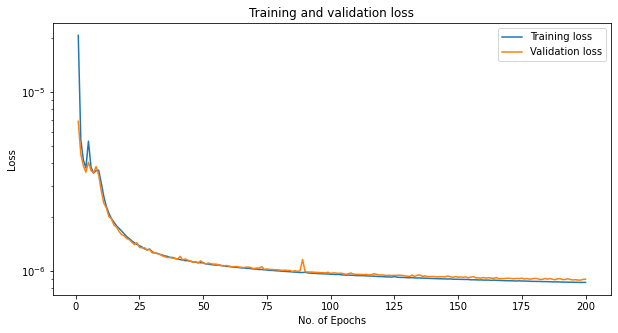

In [6]:
#Plot the data
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize= (10,5))
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.yscale('log')
plt.title('Training and validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
fig.savefig(fig_path+str(SNR)+'.jpg')
fig.savefig(fig_path+str(SNR)+'.pdf')